In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

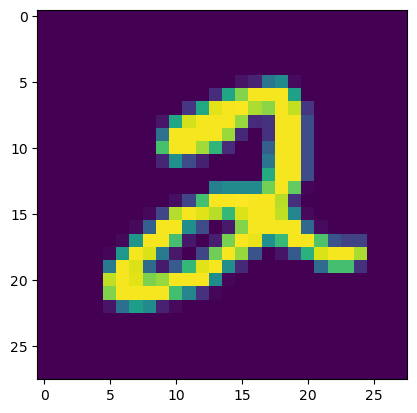

In [5]:
x_train[0]
plt.imshow(x_train[5])

### Data preprocessing

In [6]:
size = x_train.shape[1]
input_size = size*size
input_size

784

In [7]:
x_train = x_train.reshape(-1,input_size)
x_train = x_train.astype("float32")/255
x_test =x_test.reshape(-1,input_size)
x_test = x_test.astype("float32")/255

In [8]:
x_train.shape

(60000, 784)

### **Model Building**

In [9]:
model = Sequential([
    Input(shape=(784,)),
    Dense(100,activation="relu",name="layer1"),
    Dense(50,activation="relu",name="layer2"),
    Dense(25,activation="relu",name="layer3"),
    Dense(10,activation="softmax",name="layer4"),
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,validation_split=0.3,
    validation_data=None,
    shuffle=True,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3238 - accuracy: 0.9029 - val_loss: 0.2370 - val_accuracy: 0.9341
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1955 - accuracy: 0.9468 - val_loss: 0.1905 - val_accuracy: 0.9494
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1708 - accuracy: 0.9524 - val_loss: 0.1774 - val_accuracy: 0.9534
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1584 - accuracy: 0.9594 - val_loss: 0.1588 - val_accuracy: 0.9598
Epoch 5/20
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9625 - val_loss: 0.1707 - val_accuracy: 0.9581
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1314 - accuracy: 0.9666 - val_loss: 0.1653 - val_accuracy: 0.9590
Epoch 7/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1198 - accuracy: 0.9704 - val_loss: 0.2278 - val_accuracy:

### **Evaluating the Model**

In [12]:
loss,accuracy = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.9676


In [13]:
print(f"Accuracy: {accuracy*100}%")

Accuracy: 96.75999879837036%


In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.323761,0.902929,0.237001,0.934111
1,0.195473,0.946762,0.190475,0.949389
2,0.170846,0.952429,0.177422,0.953389
3,0.158378,0.959381,0.158783,0.959833
4,0.144169,0.962524,0.170743,0.958111
5,0.131369,0.966619,0.165261,0.959000
6,0.119785,0.970405,0.227837,0.953278
7,0.117145,0.969905,0.194884,0.956667
8,0.117632,0.971452,0.199142,0.956611
9,0.116635,0.972310,0.235546,0.949444
